In [17]:
from tensorflow import keras
(X_train, y_train), (X_test, y_test)=keras.datasets.fashion_mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


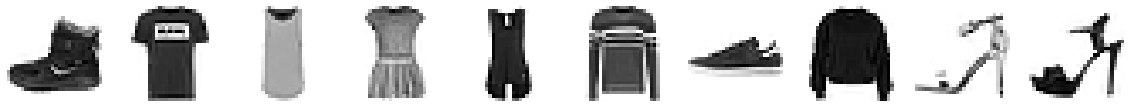

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [18]:
import matplotlib.pyplot as plt
fig, axs=plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
  axs[i].imshow(X_train[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()
print([y_train[i] for i in range(10)])

In [3]:
import numpy as np
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [19]:
X_train=X_train/255.0
X_train=X_train.reshape(-1, 28*28)
print(X_train.shape)

(60000, 784)


In [20]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log', max_iter=5, random_state=42)
scores=cross_validate(sc, X_train, y_train, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)
print(X_train.shape)
print(X_test.shape)

(48000, 784)
(12000, 784)


In [22]:
# 밀집층 생성 뉴런개수 10, 활성화 함수 softmax, input 784 1차원 데이터 
dense=keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model=keras.Sequential(dense)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6045 - accuracy: 0.7957
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4794 - accuracy: 0.8395
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4562 - accuracy: 0.8463
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4445 - accuracy: 0.8532
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4364 - accuracy: 0.8552


In [23]:
# 평가 
model.evaluate(X_test, y_test)

375/375 [==============================] - 1s 1ms/step - loss: 0.4465 - accuracy: 0.8508


[0.4464668035507202, 0.8508333563804626]